In [58]:
import pandas as pd
import seaborn as sns
import datetime 
import numpy as np
from sklearn import preprocessing

In [105]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, HuberRegressor
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [5]:
test=pd.read_csv(r"E:\InterIIT Round 3 Dataset\Test Worksheet in inter-iit-ProblemStatementIdeation_A.xlsm - R3_test.csv")
train=pd.read_csv(r"E:\InterIIT Round 3 Dataset\Train Worksheet in inter-iit-ProblemStatementIdeation_A.xlsm - R3_train.csv")

In [60]:
train2=pd.read_csv(r"C:\Users\HP\Downloads\train_conv.csv")

In [191]:
test

,Date,Temperature,EventTarget
0,11/1/2016,28,0
1,11/2/2016,29,0
2,11/3/2016,29,0
3,11/4/2016,32,0
4,11/5/2016,31,0
5,11/6/2016,34,0
6,11/7/2016,34,0
7,11/8/2016,27,0
8,11/9/2016,29,0
9,11/10/2016,31,2


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
# define example
#data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
#values = array(data)
#print(values)
# integer encode
values=test.EventTarget.values
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded_tets)

In [9]:
train.Date.nunique()

326

In [50]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
# define example
#data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
#values = array(data)
#print(values)
# integer encode
values=train.EventTarget.values
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 2 2 2 2 2 0 0 0 0 0 0
 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2
 2 2 2 2 2 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 2 2 2 2
 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0
 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2
 2 2 2 2 2 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0 0 0 2 2 2 2 2 2 2 2
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0
 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 0
 0 0 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

F:\ANACONDA\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [126]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
# define example
#data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
#values = array(data)
#print(values)
# integer encode
values=train2.Month.values
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded_month = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded_month)

[ 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7

F:\ANACONDA\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [64]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
# define example
#data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = train2.day.values
#print(values)
# integer encode
#values=train.EventTarget.values
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded_day = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded_day)

[4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5
 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0
 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2
 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4
 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6
 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1
 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3
 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5
 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0
 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2
 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4
 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6
 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1
 2 3 4 5 6 0 1 2 3 4 5 6 

F:\ANACONDA\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [65]:
np.shape(onehot_encoded_day)

(978, 7)

In [51]:
np.shape(onehot_encoded)

(978, 3)

In [59]:
temp=preprocessing.scale(train.Temperature.values.reshape(-1,1))

In [282]:
day=preprocessing.scale(train2.day.values.reshape(-1,1))

In [198]:
temp_test=preprocessing.scale(test.Temperature.values.reshape(-1,1))

In [199]:
temp_test=preprocessing.scale(test.Temperature.values.reshape(-1,1))

In [283]:
train1=np.concatenate((train.EventTarget.values.reshape(-1,1), temp,day), axis=1)

In [207]:
test1=np.concatenate((test.EventTarget.values.reshape(-1,1), temp_test), axis=1)

In [284]:
index=train.index
columns=train.columns

In [208]:
index_test=test.index
columns_test=test.columns

In [285]:
main_train=pd.DataFrame(train1,index=index)

In [210]:
main_test=pd.DataFrame(test1,index=index_test)

In [252]:
main_train

,0,1,2,3,4,5,6,7,8
0,1.0,-0.738913,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,-0.738913,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,-0.738913,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,-1.484689,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,-1.484689,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
973,0.0,-0.117433,0.0,0.0,0.0,0.0,1.0,0.0,0.0
974,0.0,-0.117433,0.0,0.0,0.0,0.0,0.0,1.0,0.0
975,0.0,0.131159,0.0,0.0,0.0,0.0,0.0,0.0,1.0
976,0.0,0.131159,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [286]:
a1=main_train.iloc[a.index,:]
b1=main_train.iloc[b.index,:]
c1=main_train.iloc[c.index,:]


In [ ]:
a1_test=main_test.iloc[a.index,:]
b1_test=main_test.iloc[b.index,:]
c1_test=main_test.iloc[c.index,:]

In [131]:
a1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,-0.738913,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,-1.484689,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,-1.608985,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,-0.738913,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,-1.360393,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,1.0,0.504047,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
966,1.0,-0.490321,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
969,1.0,0.131159,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
972,0.0,-0.117433,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [287]:
X_train,X_val,y_train,y_val=train_test_split(a1.values,train.iloc[a.index,:].n_Procedure.values,test_size=0.25,random_state=0)

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import LinearRegressionCV
clf = LinearRegression(cv=3, random_state=0).fit(a1.values, train.iloc[a.index,:].n_Procedure.values)
predicted = clf.predict(a1.values)
print(np.exp(-1*np.sqrt(mean_squared_error(predicted,train.iloc[a.index,:].n_Procedure.values))))

ImportError: cannot import name 'LinearRegressionCV' from 'sklearn.linear_model' (F:\ANACONDA\lib\site-packages\sklearn\linear_model\__init__.py)

In [174]:
from sklearn.linear_model import LinearRegression,LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
from sklearn.svm import SVR


In [288]:
def lets_try(X_train,X_val,y_train,y_val):
    results={}
    def test_model(clf):
        
        model=clf
        model.fit(X_train, y_train)
        y_val_pred=np.ones(np.shape(model.predict(X_val)),dtype=float)*2.5
        rmse=np.sqrt(mean_squared_error(y_val_pred,y_val))
        score=[np.exp(-1*rmse)]
        return score

    clf = LinearRegression()
    results["Linear"]=test_model(clf)
    
    clf = Ridge()
    results["Ridge"]=test_model(clf)
    
    clf = BayesianRidge(alpha_1=.01,alpha_2=100,lambda_1=.001,lambda_2=0.000001)
    results["Bayesian Ridge"]=test_model(clf)
    
    clf = HuberRegressor()
    results["Hubber"]=test_model(clf)
    
    clf = Lasso(alpha=1e-4)
    results["Lasso"]=test_model(clf)
    
    clf = BaggingRegressor()
    results["Bagging"]=test_model(clf)
    
    clf = RandomForestRegressor()
    results["RandomForest"]=test_model(clf)
    
    clf = AdaBoostRegressor()
    results["AdaBoost"]=test_model(clf)
    
    clf = SVR()
    results["SVM RBF"]=test_model(clf)
    
    clf = SVR(kernel="linear")
    results["SVM Linear"]=test_model(clf)
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["Score"] 
    return results

lets_try(X_train,X_val,y_train,y_val)

F:\ANACONDA\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
F:\ANACONDA\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


,Score
Linear,0.047011
Ridge,0.047011
Bayesian Ridge,0.047011
Hubber,0.047011
Lasso,0.047011
Bagging,0.047011
RandomForest,0.047011
AdaBoost,0.047011
SVM RBF,0.047011
SVM Linear,0.047011


In [236]:
clf=BayesianRidge(alpha_1=.01,alpha_2=100,lambda_1=.001,lambda_2=0.000001).fit(X=c1.values,y=train.iloc[c.index,:].n_Procedure.values)

In [213]:
a_pred=np.ones(clf.predict(main_test.values),dtype=float)

In [214]:
a_pred

array([5.38957554, 5.38957219, 5.38957219, 5.38956211, 5.38956547,
       5.3895554 , 5.3895554 , 5.3895789 , 5.38957219, 5.38955969,
       5.38955298, 5.38957313, 5.38958226, 5.38955875, 5.38957937,
       5.38956594, 5.38958273, 5.38956883, 5.38957219, 5.38956883,
       5.38958226, 5.38956547, 5.38956547, 5.38958562, 5.38956547,
       5.38956547, 5.38957219, 5.38958562, 5.38958562, 5.38957219,
       5.38956883, 5.38956547, 5.38956211, 5.38956883, 5.38956211,
       5.38956305, 5.38957984, 5.38956977, 5.38957313, 5.38957984,
       5.38959328])

In [235]:
b_pred=clf.predict(main_test.values)

In [237]:
c_pred=clf.predict(main_test.values)

In [67]:
np.shape(train1)

(978, 11)

In [49]:
train

,Date,Procedure,n_Procedure,Temperature,EventTarget
0,12/11/2015,A,1,27,1
1,12/11/2015,B,1,27,1
2,12/11/2015,C,0,27,1
3,12/12/2015,A,3,21,0
4,12/12/2015,B,2,21,0
...,...,...,...,...,...
973,10/30/2016,B,9,32,0
974,10/30/2016,C,0,32,0
975,10/31/2016,A,5,34,0
976,10/31/2016,B,4,34,0


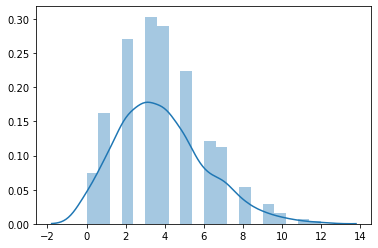

In [48]:
sns.distplot((train.n_Procedure.values))

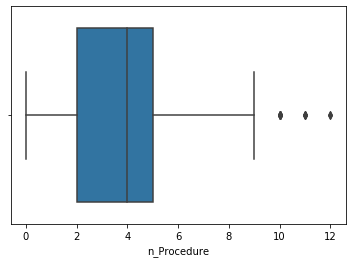

In [44]:
sns.boxplot(train.n_Procedure)

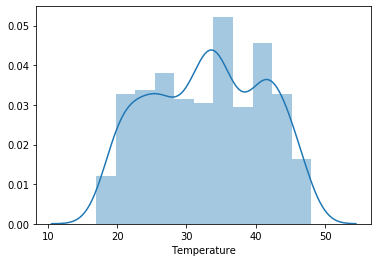

In [13]:
sns.distplot(train.Temperature)

In [14]:
a=train.loc[train.Procedure=='A']
b=train.loc[train.Procedure=='B']
c=train.loc[train.Procedure=='C']

In [15]:
a.EventTarget.value_counts()

0    209
2     86
1     31
Name: EventTarget, dtype: int64

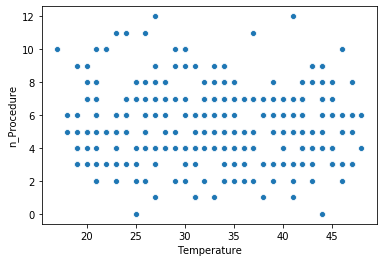

In [17]:
sns.scatterplot(a.Temperature,a.n_Procedure)

In [18]:
a

,Date,Procedure,n_Procedure,Temperature,EventTarget
0,12/11/2015,A,1,27,1
3,12/12/2015,A,3,21,0
6,12/13/2015,A,5,20,1
9,12/14/2015,A,8,27,0
12,12/15/2015,A,10,22,0
...,...,...,...,...,...
963,10/27/2016,A,5,37,1
966,10/28/2016,A,4,29,1
969,10/29/2016,A,7,34,1
972,10/30/2016,A,4,32,0


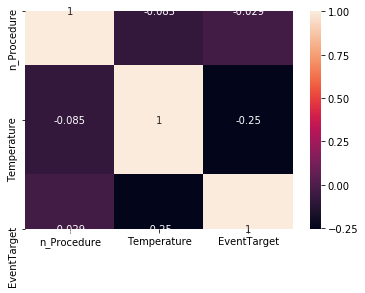

In [19]:
import seaborn as sns

Var_Corr = a.iloc[:,1:].corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

In [22]:
a.loc[a.EventTarget==0]

,Date,Procedure,n_Procedure,Temperature,EventTarget
3,12/12/2015,A,3,21,0
9,12/14/2015,A,8,27,0
12,12/15/2015,A,10,22,0
15,12/16/2015,A,5,23,0
39,12/24/2015,A,6,23,0
...,...,...,...,...,...
951,10/23/2016,A,5,34,0
954,10/24/2016,A,7,32,0
957,10/25/2016,A,4,30,0
972,10/30/2016,A,4,32,0


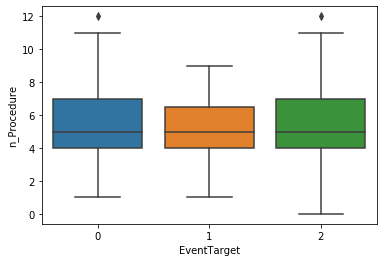

In [34]:
sns.boxplot(y="n_Procedure",data=a,x="EventTarget")

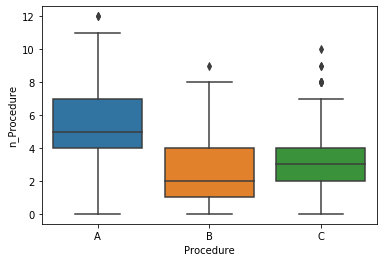

In [249]:
sns.boxplot(y="n_Procedure",data=train,x="Procedure")

In [43]:
for i in range(0,train.shape[0]):
    temp_str=train.iloc[i,:].Date
    temp_obj= datetime.datetime.strptime(temp_str, '%b %d %Y %I:%M%p')
    train['Month']=temp_obj.datetime.month()

ValueError: time data '12/11/2015' does not match format '%b %d %Y %I:%M%p'

In [241]:
a_pred.size


41

In [239]:
b_pred

array([2.65950869, 2.65950983, 2.65950983, 2.65951325, 2.65951211,
       2.65951552, 2.65951552, 2.65950755, 2.65950983, 2.65951027,
       2.65951255, 2.65950571, 2.65950641, 2.65951439, 2.65950549,
       2.65951005, 2.65950436, 2.65951097, 2.65950983, 2.65951097,
       2.65950641, 2.65951211, 2.65951211, 2.65950527, 2.65951211,
       2.65951211, 2.65950983, 2.65950527, 2.65950527, 2.65950983,
       2.65951097, 2.65951211, 2.65951325, 2.65951097, 2.65951325,
       2.65950913, 2.65950344, 2.65950685, 2.65950571, 2.65950344,
       2.65949888])

In [240]:
c_pred

array([3.40435987, 3.4195698 , 3.4195698 , 3.46519961, 3.44998967,
       3.49561948, 3.49561948, 3.38914993, 3.4195698 , 3.43483814,
       3.46525801, 3.3739984 , 3.37394   , 3.48040955, 3.36636423,
       3.42720397, 3.35115429, 3.43477974, 3.4195698 , 3.43477974,
       3.37394   , 3.44998967, 3.44998967, 3.35873006, 3.44998967,
       3.44998967, 3.4195698 , 3.35873006, 3.35873006, 3.4195698 ,
       3.43477974, 3.44998967, 3.46519961, 3.43477974, 3.46519961,
       3.4196282 , 3.34357853, 3.38920833, 3.3739984 , 3.34357853,
       3.28273878])

In [242]:
res = []
for i in range(41):
    res.append(a_pred[i])
    res.append(b_pred[i])
    res.append(c_pred[i])

In [243]:
res

[5.389575544765124,
 2.6595086910898402,
 3.404359867324115,
 5.389572186591243,
 2.659509830065319,
 3.4195698030386903,
 5.389572186591243,
 2.659509830065319,
 3.4195698030386903,
 5.389562112069601,
 2.6595132469917555,
 3.4651996101824154,
 5.389565470243482,
 2.6595121080162767,
 3.44998967446784,
 5.38955539572184,
 2.6595155249427136,
 3.4956194816115658,
 5.38955539572184,
 2.6595155249427136,
 3.4956194816115658,
 5.389578902939005,
 2.6595075521143614,
 3.38914993160954,
 5.389572186591243,
 2.659509830065319,
 3.4195698030386903,
 5.389559694559731,
 2.65951027068814,
 3.43483814032649,
 5.389552978211969,
 2.6595125486390976,
 3.4652580117556404,
 5.389573127255254,
 2.659505714786224,
 3.3739983974681897,
 5.389582261112886,
 2.6595064131388826,
 3.3739399958949647,
 5.38955875389572,
 2.6595143859672343,
 3.4804095458969906,
 5.38957937327101,
 2.6595054944748138,
 3.3663642288242897,
 5.389565940575487,
 2.6595100503767295,
 3.4272039716825904,
 5.389582731444891,
 2.65

In [245]:
result = pd.DataFrame(res)

In [246]:
result

,0
0,5.389576
1,2.659509
2,3.404360
3,5.389572
4,2.659510
...,...
118,2.659503
119,3.343579
120,5.389593
121,2.659499


In [248]:
result.to_csv("res1.csv")